In [ ]:
#Mini Project - Consumer Complaint Resolution

In [148]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
complaint_df_train = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Consumer_Complaints_train.csv")
complaint_df_train.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
5,2014-01-10,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,33180,NaN,NaN,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
6,2016-02-03,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,Homeowner applied for 2nd modification due to ...,NaN,Ocwen,NJ,071XX,NaN,Consent provided,Web,2016-02-03,Closed with explanation,Yes,No,1771444
7,2015-12-07,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,60610,NaN,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
8,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,18337,NaN,NaN,Web,2012-04-05,Closed with relief,Yes,Yes,44225
9,2015-08-13,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,NaN,Company believes the complaint is the result o...,Grant & Weber,CA,91302,NaN,Consent not provided,Web,2015-08-20,Closed with explanation,Yes,No,1518460


In [150]:
complaint_df_test = pd.read_csv(r"C:\Users\827180\AppData\Local\Programs\Python\Python311\Scripts\Data Science & ML Training Docs\Consumer_Complaints_test.csv")
complaint_df_test.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667
5,2012-01-08,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,JPMorgan Chase & Co.,MI,48836,NaN,NaN,Web,2012-01-09,Closed without relief,Yes,11475
6,2015-12-19,Credit reporting,NaN,Incorrect information on credit report,Personal information,I have contacted Experian and told them to rem...,Company chooses not to provide a public response,Experian,GA,309XX,NaN,Consent provided,Web,2015-12-19,Closed with non-monetary relief,Yes,1708256
7,2013-06-28,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"TransUnion Intermediate Holdings, Inc.",FL,33070,NaN,NaN,Postal mail,2013-07-01,Closed with explanation,Yes,445895
8,2014-07-16,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Citibank,CA,94070,NaN,NaN,Web,2014-07-22,Closed with explanation,Yes,940573
9,2014-07-29,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"The CBE Group, Inc.",IA,50315,NaN,NaN,Web,2014-07-29,Closed with explanation,Yes,959328


In [151]:
complaint_df_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [152]:
complaint_df_test.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

In [154]:
complaint_df_train.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [155]:
complaint_df_train.dropna(thresh=complaint_df_train.shape[0]*0.75,axis=1,inplace=True)
complaint_df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670


In [156]:
complaint_df_test.isnull().sum()

Date received                        0
Product                              0
Sub-product                      34683
Issue                                0
Sub-issue                        73250
Consumer complaint narrative    100692
Company public response          97146
Company                              0
State                              936
ZIP code                           937
Tags                            102629
Consumer consent provided?       85699
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Complaint ID                         0
dtype: int64

In [157]:
complaint_df_test.dropna(thresh=complaint_df_test.shape[0]*0.75,axis=1,inplace=True)
complaint_df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667
...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765


In [158]:
complaint_df_train['year'] = pd.DatetimeIndex(complaint_df_train['Date received']).year
complaint_df_train['month'] = pd.DatetimeIndex(complaint_df_train['Date received']).month
complaint_df_train['day'] = pd.DatetimeIndex(complaint_df_train['Date received']).day
complaint_df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year,month,day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25


In [159]:
complaint_df_test['year'] = pd.DatetimeIndex(complaint_df_test['Date received']).year
complaint_df_test['month'] = pd.DatetimeIndex(complaint_df_test['Date received']).month
complaint_df_test['day'] = pd.DatetimeIndex(complaint_df_test['Date received']).day
complaint_df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,year,month,day
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,2,9
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,5,15
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,6,7


In [160]:
#Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

complaint_df_train['Days held'] = pd.to_datetime(complaint_df_train['Date sent to company']) - pd.to_datetime(complaint_df_train["Date received"])
complaint_df_train['Days held'] = complaint_df_train['Days held'].dt.days


complaint_df_test['Days held'] = pd.to_datetime(complaint_df_test['Date sent to company']) - pd.to_datetime(complaint_df_test["Date received"])
complaint_df_test['Days held'] = complaint_df_test['Days held'].dt.days


In [163]:
complaint_df_train

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year,month,day,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20,14
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,3,3,1
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,4,14,-1
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,3,14,4
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,2,1,0
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,6,25,4


In [165]:
complaint_df_test

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,year,month,day,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,9,4,0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,5,17,3
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,2,9,0
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13,1
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,5,15,0
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,6,7,0


In [166]:
#Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields

complaint_df_train.drop(['Date received','Date sent to company','ZIP code','Complaint ID'], axis=1,inplace=True)

complaint_df_test.drop(['Date received','Date sent to company','ZIP code','Complaint ID'], axis=1,inplace=True)

In [167]:
complaint_df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,year,month,day,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4


In [168]:
complaint_df_test

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,year,month,day,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,17,0
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,22,0
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,4,0
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,17,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,2,9,0
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13,1
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,5,15,0
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,6,7,0


In [169]:
#Imputing Null value in “State” by Mode

complaint_df_train['State'].fillna(complaint_df_train['State'].mode()[0],inplace=True)

complaint_df_test['State'].fillna(complaint_df_test['State'].mode()[0],inplace=True)

In [170]:
#With the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving

complaint_df_train['Week_Received'] = complaint_df_train['day'].apply(lambda d: (d - 1) // 7 + 1)

complaint_df_test['Week_Received'] = complaint_df_test['day'].apply(lambda d: (d - 1) // 7 + 1)

In [171]:
complaint_df_train

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,year,month,day,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,26,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,30,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,4,14,-1,2
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,3,14,4,2
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,2,1,0,1
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,6,25,4,4


In [172]:
dispute_count = complaint_df_train['Consumer disputed?'].value_counts()
dispute = dispute_count.index
count = dispute_count.values

print(dispute,count)

Index(['No', 'Yes'], dtype='object', name='Consumer disputed?') [282638  76172]


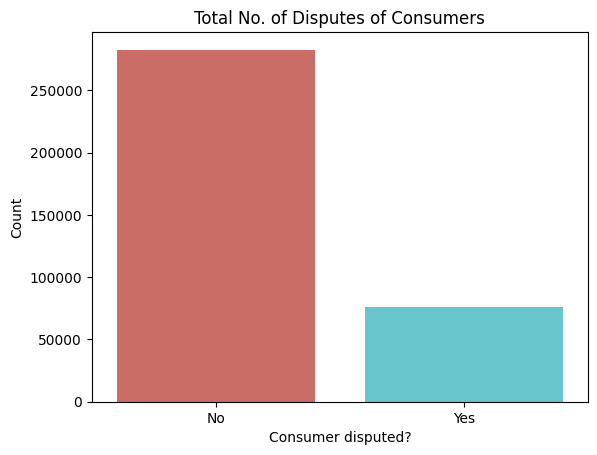

In [173]:
#Plot bar graph of the total no of disputes of consumers

sns.barplot(x = dispute, y = count, palette='hls')
plt.ylabel('Count')
plt.xlabel('Consumer disputed?')
plt.title('Total No. of Disputes of Consumers')
plt.show()

In [174]:
df = complaint_df_train[complaint_df_train['Consumer disputed?']=="Yes"].loc[:,['Product','Consumer disputed?']]
product_dispute = df.groupby('Product')['Consumer disputed?'].agg("count")

In [175]:
product_dispute

Product
Bank account or service     8245
Consumer Loan               3324
Credit card                 9409
Credit reporting           10806
Debt collection            12776
Money transfers              382
Mortgage                   28080
Other financial service       90
Payday loan                  408
Prepaid card                 255
Student loan                2395
Virtual currency               2
Name: Consumer disputed?, dtype: int64

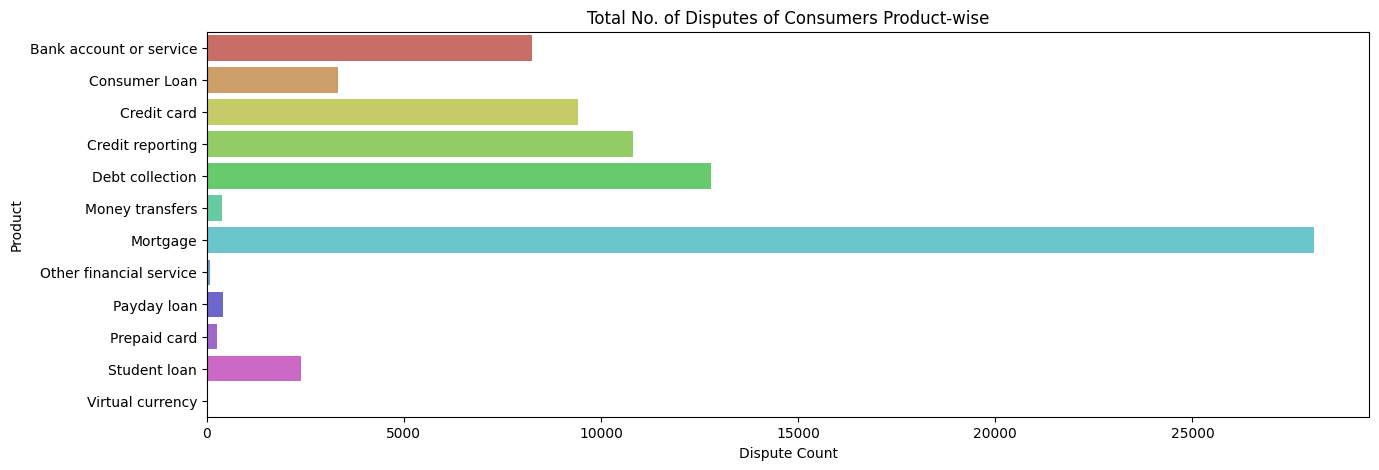

In [176]:
#Plot bar graph of the total no of disputes products-wise

plt.figure(figsize=(15, 5))
sns.barplot(x = product_dispute.values, y = product_dispute.index, palette='hls')
plt.xlabel('Dispute Count')
plt.ylabel('Product')
plt.title('Total No. of Disputes of Consumers Product-wise')
plt.show()

In [177]:
df = complaint_df_train[complaint_df_train['Consumer disputed?']=="Yes"].loc[:,['Issue','Consumer disputed?']]
issue_dispute = df.groupby('Issue')['Consumer disputed?'].agg("count").sort_values(ascending=False)

In [178]:
issue_dispute

Issue
Loan modification,collection,foreclosure    13937
Loan servicing, payments, escrow account     9503
Incorrect information on credit report       7063
Cont'd attempts collect debt not owed        5223
Account opening, closing, or management      3804
                                            ...  
Lost or stolen check                            4
Lost or stolen money order                      4
Lender repossessed or sold the vehicle          3
Lender damaged or destroyed property            1
Lender sold the property                        1
Name: Consumer disputed?, Length: 94, dtype: int64

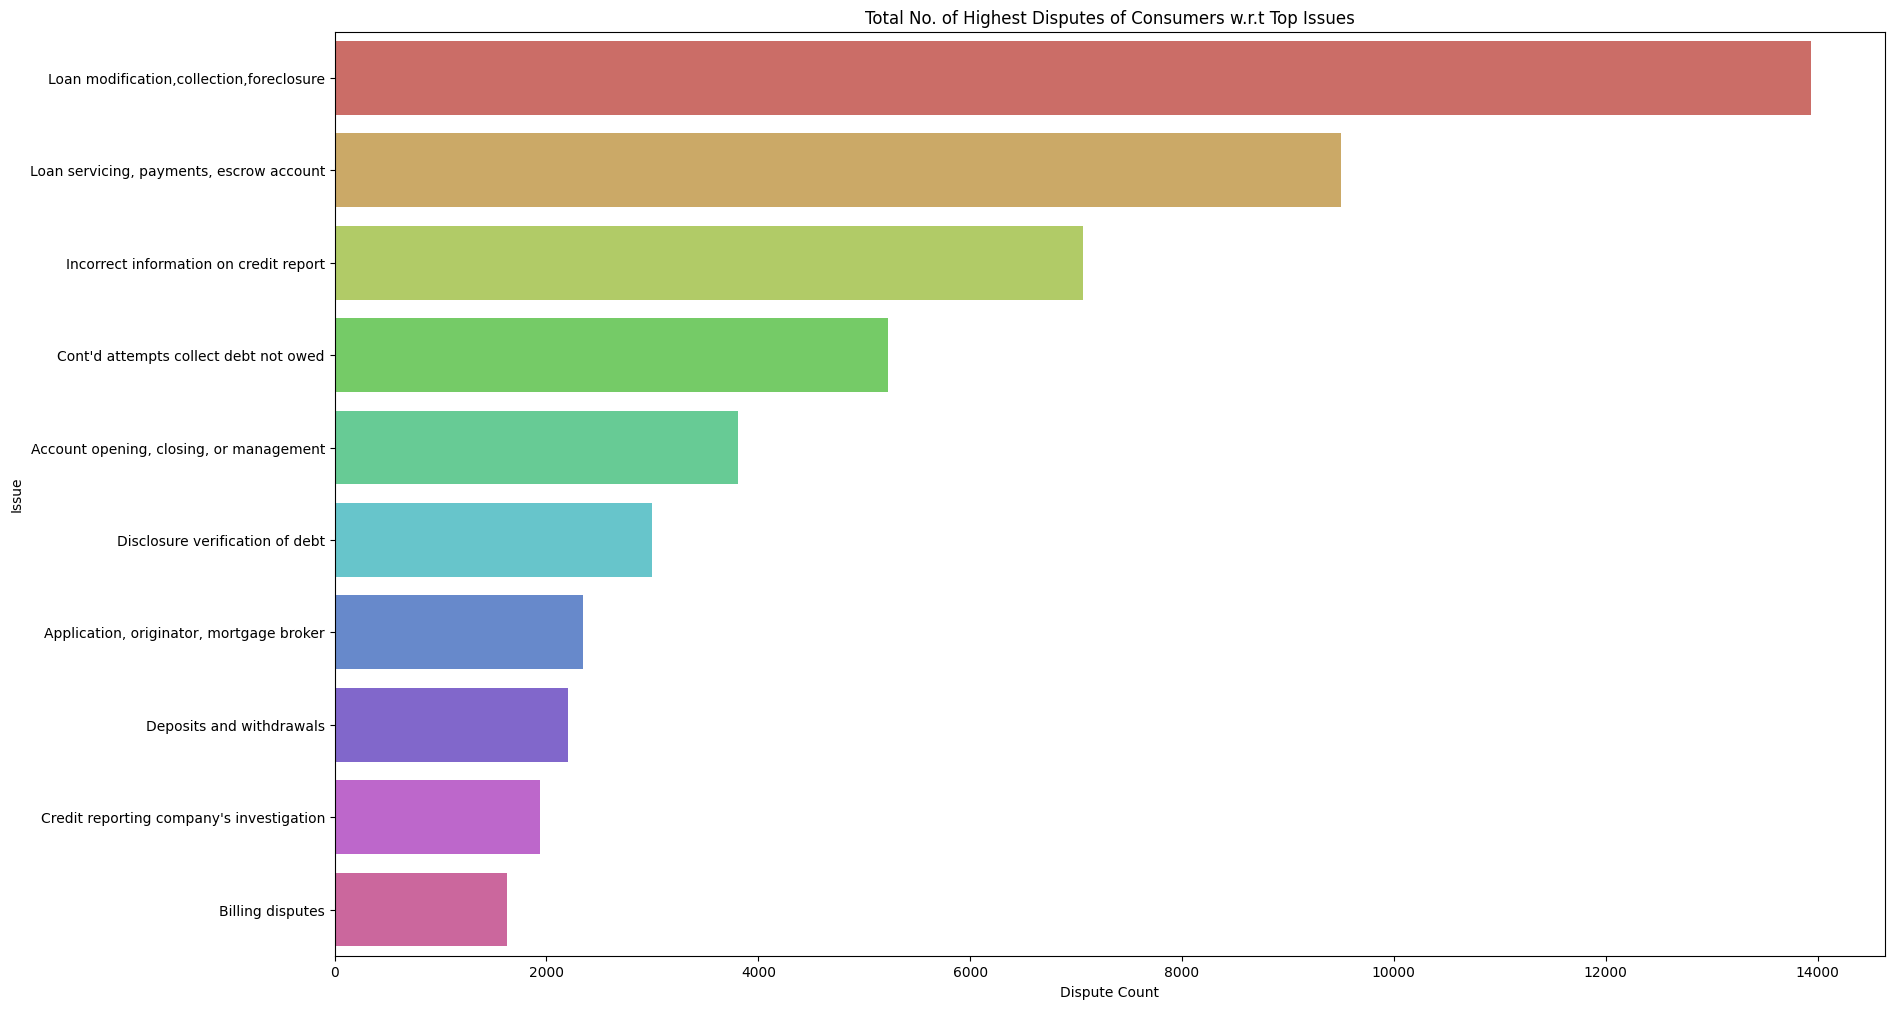

In [179]:
#Plot bar graph of the total no of disputes with Top Issues by Highest Disputes
#Let's consider top 10 issues by highest number of disputes

plt.figure(figsize=(20, 12))
sns.barplot(x = issue_dispute.values[0:10], y = issue_dispute.index[0:10], palette='hls')
plt.xlabel('Dispute Count')
plt.ylabel('Issue')
plt.title('Total No. of Highest Disputes of Consumers w.r.t Top Issues')
plt.show()

In [180]:
df = complaint_df_train[complaint_df_train['Consumer disputed?']=="Yes"].loc[:,['State','Consumer disputed?']]
state_dispute = df.groupby('State')['Consumer disputed?'].agg("count").sort_values(ascending=False)

In [181]:
state_dispute

State
CA    12217
FL     7152
TX     5262
NY     5001
GA     3302
      ...  
PW        3
MP        3
MH        3
AS        3
AA        3
Name: Consumer disputed?, Length: 62, dtype: int64

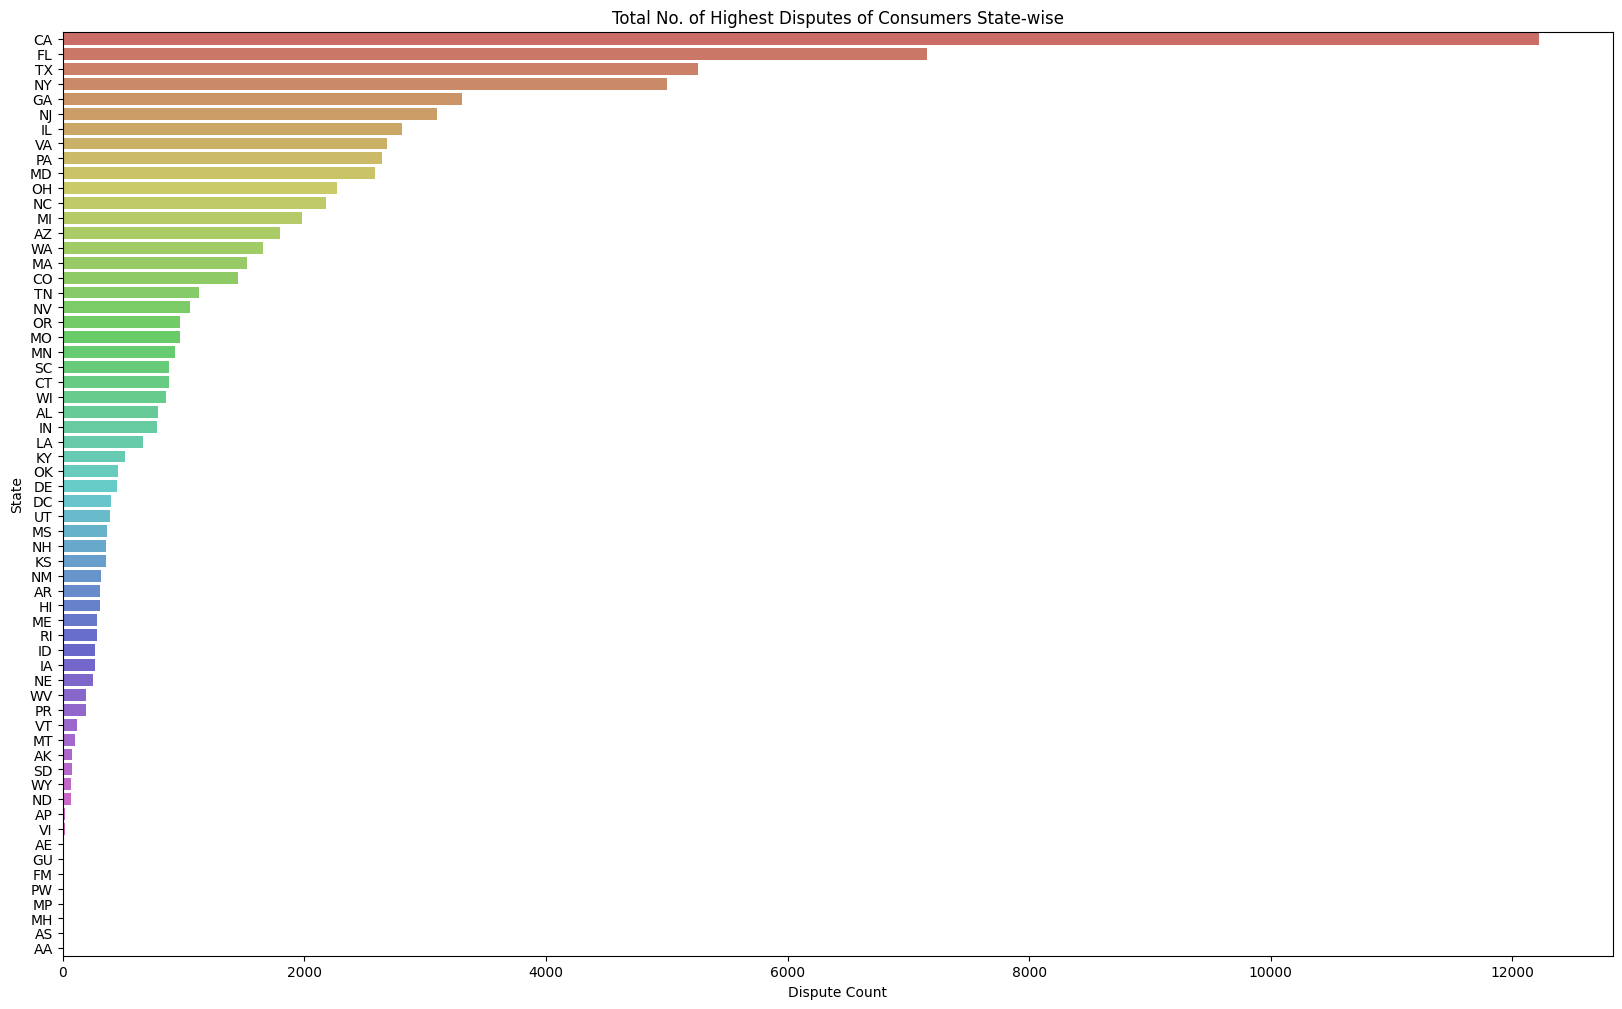

In [182]:
#Plot bar graph of the total no of disputes by State with Maximum Disputes

plt.figure(figsize=(20, 12))
sns.barplot(x = state_dispute.values, y = state_dispute.index, palette='hls')
plt.xlabel('Dispute Count')
plt.ylabel('State')
plt.title('Total No. of Highest Disputes of Consumers State-wise')
plt.show()

In [183]:
df = complaint_df_train[complaint_df_train['Consumer disputed?']=="Yes"].loc[:,['Submitted via','Consumer disputed?']]
source_dispute = df.groupby('Submitted via')['Consumer disputed?'].agg("count")

In [184]:
source_dispute

Submitted via
Email             35
Fax             1117
Phone           4456
Postal mail     3497
Referral       12066
Web            55001
Name: Consumer disputed?, dtype: int64

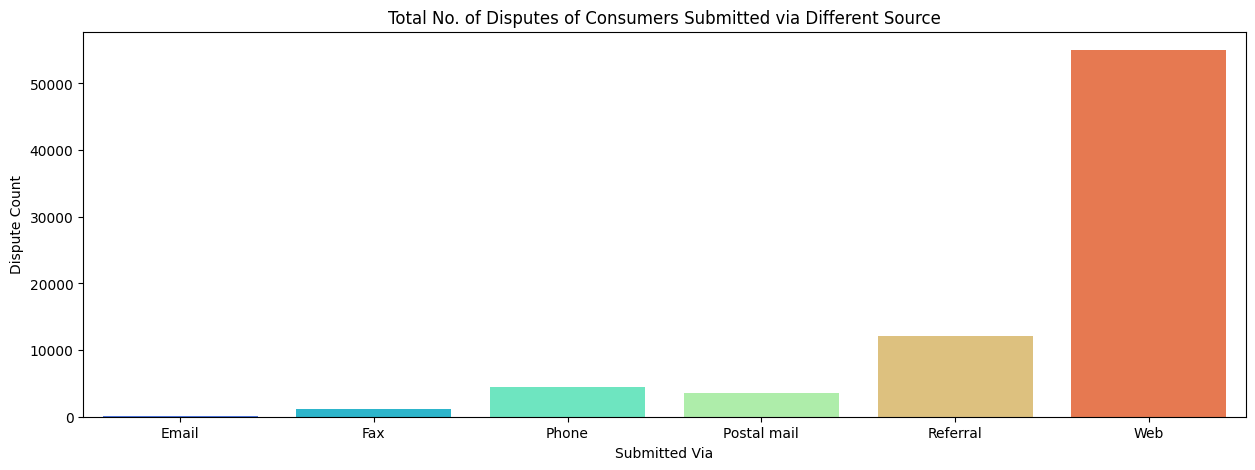

In [185]:
#Plot bar graph of the total no of disputes Submitted Via different source

plt.figure(figsize=(15,5))
sns.barplot(x = source_dispute.index, y = source_dispute.values, palette='rainbow')
plt.ylabel('Dispute Count')
plt.xlabel('Submitted Via')
plt.title('Total No. of Disputes of Consumers Submitted via Different Source')
plt.show()

In [186]:
df = complaint_df_train[(complaint_df_train['Consumer disputed?']=="Yes") & (complaint_df_train['Timely response?']=="No")].loc[:,['Timely response?','Consumer disputed?']]
no_res_dispute = df.groupby('Timely response?')['Consumer disputed?'].agg("count")

In [187]:
no_res_dispute

Timely response?
No    1229
Name: Consumer disputed?, dtype: int64

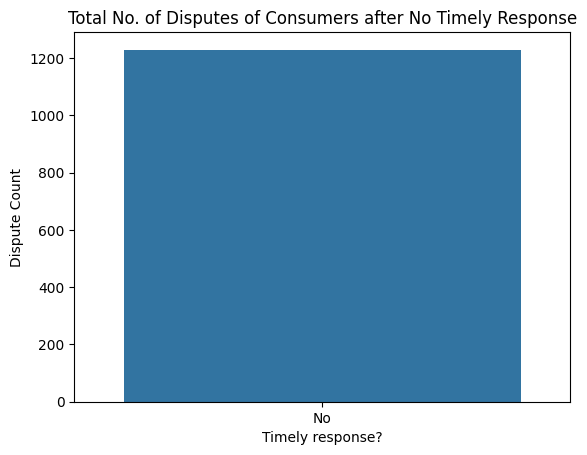

In [188]:
#Plot bar graph for no. of times customer disputed after no timely response

sns.barplot(x = no_res_dispute.index, y = no_res_dispute.values)
plt.ylabel('Dispute Count')
plt.xlabel('Timely response?')
plt.title('Total No. of Disputes of Consumers after No Timely Response')
plt.show()

In [189]:
df = complaint_df_train[(complaint_df_train['Consumer disputed?']=="Yes") & (complaint_df_train['Timely response?']=="Yes")].loc[:,['Timely response?','Consumer disputed?']]
res_dispute = df.groupby('Timely response?')['Consumer disputed?'].agg("count")

In [190]:
res_dispute

Timely response?
Yes    74943
Name: Consumer disputed?, dtype: int64

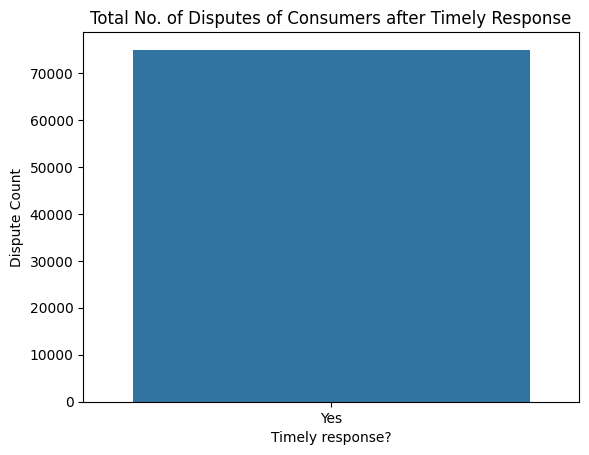

In [191]:
#Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

sns.barplot(x = res_dispute.index, y = res_dispute.values)
plt.ylabel('Dispute Count')
plt.xlabel('Timely response?')
plt.title('Total No. of Disputes of Consumers after Timely Response')
plt.show()

In [192]:
df = complaint_df_train[complaint_df_train['Consumer disputed?']=="Yes"].loc[:,['year','Consumer disputed?']]
year_dispute = df.groupby('year')['Consumer disputed?'].agg("count")

In [193]:
year_dispute

year
2011      346
2012     9830
2013    13615
2014    17814
2015    20580
2016    13987
Name: Consumer disputed?, dtype: int64

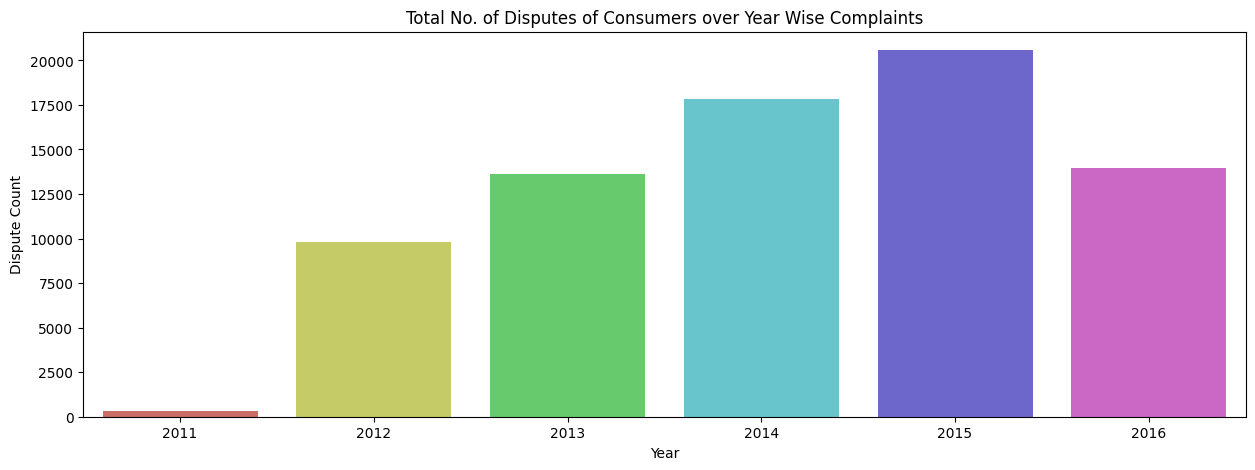

In [194]:
#Plot bar graph of the total no of disputes over Year Wise Complaints

plt.figure(figsize=(15,5))
sns.barplot(x = year_dispute.index, y = year_dispute.values, palette='hls')
plt.ylabel('Dispute Count')
plt.xlabel('Year')
plt.title('Total No. of Disputes of Consumers over Year Wise Complaints')
plt.show()

In [195]:
company = complaint_df_train['Company'].value_counts().sort_values(ascending=False)
company

Company
Bank of America                     34903
Wells Fargo & Company               26490
JPMorgan Chase & Co.                21677
Equifax                             21489
Experian                            20075
                                    ...  
The Law Office of Edwin B. Parry        1
New Southern Loans, Inc                 1
Harrington, anderson & deblasio         1
J. B. Collections                       1
National Loan Investors, LP             1
Name: count, Length: 3064, dtype: int64

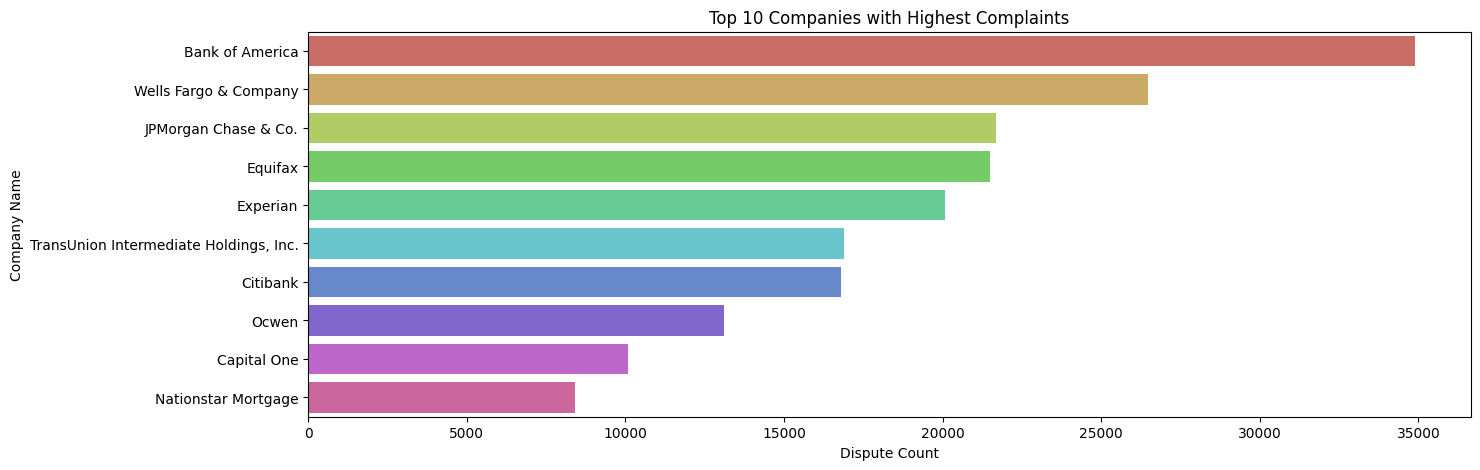

In [196]:
#Plot bar graph of Top Companies with Highest Complaints
#Let's take top 10 companies who have received the highest number of complaints

plt.figure(figsize=(15,5))
sns.barplot(x = company.values[0:10], y = company.index[0:10], palette = 'hls')
plt.xlabel('Dispute Count')
plt.ylabel('Company Name')
plt.title('Top 10 Companies with Highest Complaints')
plt.show()

In [203]:
#Convert all negative days held to zero

complaint_df_train['Days held'] = np.where((complaint_df_train['Days held']<0),0,complaint_df_train['Days held'])

complaint_df_test['Days held'] = np.where((complaint_df_test['Days held']<0),0,complaint_df_test['Days held'])

In [206]:
#Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'

complaint_df_train_filtered = complaint_df_train.drop(['Company','State','year','Days held'], axis=1)

complaint_df_test_filtered = complaint_df_test.drop(['Company','State','year','Days held'], axis=1)

In [281]:
k = complaint_df_train_filtered['Issue'].value_counts()
for val in k.axes[0][0:10]:
    varname = 'Issue_'+val.replace(',','_').replace(' ','_')
    complaint_df_train_filtered[varname] = np.where(complaint_df_train_filtered['Issue']==val,1,0)

del complaint_df_train_filtered['Issue']

In [282]:
complaint_df_train_filtered

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,month,day,Week_Received,Issue_Loan_modification_collection_foreclosure,Issue_Incorrect_information_on_credit_report,Issue_Loan_servicing__payments__escrow_account,Issue_Cont'd_attempts_collect_debt_not_owed,Issue_Account_opening__closing__or_management,Issue_Disclosure_verification_of_debt,Issue_Communication_tactics,Issue_Deposits_and_withdrawals,Issue_Application__originator__mortgage_broker,Issue_Billing_disputes
0,Credit reporting,Web,Closed with explanation,Yes,0,10,14,2,0,1,0,0,0,0,0,0,0,0
1,Bank account or service,Web,Closed with explanation,Yes,1,4,26,4,0,0,0,0,0,0,0,1,0,0
2,Credit card,Phone,Closed with non-monetary relief,Yes,0,12,20,3,0,0,0,0,0,0,0,0,0,0
3,Debt collection,Referral,Closed with explanation,Yes,0,3,3,1,0,0,0,0,0,1,0,0,0,0
4,Debt collection,Web,Closed with explanation,Yes,1,1,30,5,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Web,Closed with non-monetary relief,Yes,0,4,14,2,0,1,0,0,0,0,0,0,0,0
358806,Mortgage,Referral,Closed with non-monetary relief,Yes,0,3,14,2,1,0,0,0,0,0,0,0,0,0
358807,Credit card,Web,Closed,Yes,1,2,1,1,0,0,0,0,0,0,0,0,0,0
358808,Debt collection,Phone,Closed with non-monetary relief,Yes,0,6,25,4,0,0,0,1,0,0,0,0,0,0


In [283]:
n = complaint_df_test_filtered['Issue'].value_counts()
for val in n.axes[0][0:10]:
    varname = 'Issue_'+val.replace(',','_').replace(' ','_')
    complaint_df_test_filtered[varname] = np.where(complaint_df_test_filtered['Issue']==val,1,0)

del complaint_df_test_filtered['Issue']

In [284]:
complaint_df_test_filtered

,Product,Submitted via,Company response to consumer,Timely response?,month,day,Week_Received,Issue_Loan_modification_collection_foreclosure,Issue_Incorrect_information_on_credit_report,Issue_Loan_servicing__payments__escrow_account,Issue_Cont'd_attempts_collect_debt_not_owed,Issue_Account_opening__closing__or_management,Issue_Disclosure_verification_of_debt,Issue_Communication_tactics,Issue_Deposits_and_withdrawals,Issue_Application__originator__mortgage_broker,Issue_Credit_reporting_company's_investigation
0,Credit card,Web,Closed with monetary relief,Yes,1,17,3,0,0,0,0,0,0,0,0,0,0
1,Consumer Loan,Phone,Closed with explanation,Yes,6,22,4,0,0,0,0,0,0,0,0,0,0
2,Credit card,Web,Closed with explanation,Yes,9,4,1,0,0,0,0,0,0,0,0,0,0
3,Consumer Loan,Web,Closed with non-monetary relief,Yes,5,17,3,0,0,0,0,0,0,0,0,0,0
4,Debt collection,Web,Closed with explanation,Yes,7,7,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Web,Closed with explanation,Yes,2,9,2,0,0,0,0,0,0,0,0,0,0
119602,Credit card,Web,Closed with explanation,Yes,11,13,2,0,0,0,0,0,0,0,0,0,0
119603,Mortgage,Referral,Closed without relief,Yes,5,15,3,1,0,0,0,0,0,0,0,0,0
119604,Credit reporting,Web,Closed with explanation,Yes,6,7,1,0,1,0,0,0,0,0,0,0,0


In [285]:
#Change Consumer Disputed Column to 0 and 1 (yes to 1, and no to 0)

complaint_df_train_filtered['Consumer disputed?'].replace(to_replace="Yes",value=1,inplace=True)
complaint_df_train_filtered['Consumer disputed?'].replace(to_replace="No",value=0,inplace=True)

In [286]:
complaint_df_train_filtered['Consumer disputed?'].value_counts()

Consumer disputed?
0    282638
1     76172
Name: count, dtype: int64

In [288]:
#Create Dummy Variables for categorical features and concat with the original data frame like: 'Product,’'Submitted via,’'Company response to consumer,’'Timely response?'

complaint_df_train_ohe = pd.get_dummies(complaint_df_train_filtered, columns = ['Product','Submitted via','Company response to consumer','Timely response?'],drop_first=True) 
complaint_df_train_ohe


,Consumer disputed?,month,day,Week_Received,Issue_Loan_modification_collection_foreclosure,Issue_Incorrect_information_on_credit_report,Issue_Loan_servicing__payments__escrow_account,Issue_Cont'd_attempts_collect_debt_not_owed,Issue_Account_opening__closing__or_management,Issue_Disclosure_verification_of_debt,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,10,14,2,0,1,0,0,0,0,...,False,False,False,True,True,False,False,False,False,True
1,1,4,26,4,0,0,0,0,0,0,...,False,False,False,True,True,False,False,False,False,True
2,0,12,20,3,0,0,0,0,0,0,...,True,False,False,False,False,False,True,False,False,True
3,0,3,3,1,0,0,0,0,0,1,...,False,False,True,False,True,False,False,False,False,True
4,1,1,30,5,0,0,0,0,0,1,...,False,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,4,14,2,0,1,0,0,0,0,...,False,False,False,True,False,False,True,False,False,True
358806,0,3,14,2,1,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,True
358807,1,2,1,1,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True
358808,0,6,25,4,0,0,0,1,0,0,...,True,False,False,False,False,False,True,False,False,True


In [289]:
#Scaling the Data Sets (Note: discard dependent variable before doing standardization)

X = complaint_df_train_ohe.drop(['Consumer disputed?'],axis=1)
y = complaint_df_train_ohe['Consumer disputed?']
X.shape, y.shape

((358810, 35), (358810,))

In [290]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [291]:
X_train.shape,y_train.shape

((287048, 35), (287048,))

In [292]:
X_val.shape,y_val.shape

((71762, 35), (71762,))

In [293]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.fit_transform(X_val)

In [294]:
X_train_scaled

array([[-0.64110995, -1.57423901, -1.34589121, ..., 10.5251516 ,
        -0.17447464,  0.13183776],
       [-0.93891276, -1.22985968, -1.34589121, ..., -0.09501051,
        -0.17447464,  0.13183776],
       [ 1.14570689,  0.60683008,  0.23974449, ..., -0.09501051,
        -0.17447464,  0.13183776],
       ...,
       [-1.23671557, -1.00027346, -1.34589121, ..., -0.09501051,
        -0.17447464,  0.13183776],
       [ 0.84790408, -0.77068724, -0.55307336, ..., -0.09501051,
        -0.17447464,  0.13183776],
       [-0.93891276,  1.63996807,  1.82538018, ..., -0.09501051,
        -0.17447464,  0.13183776]])

In [295]:
X_val_scaled

array([[ 1.44903399, -1.11020387, -1.34389871, ..., -0.08947915,
        -0.17464418,  0.13211101],
       [-0.64153057, -1.57020289, -1.34389871, ..., -0.08947915,
        -0.17464418,  0.13211101],
       [ 1.74768607,  0.4997927 ,  0.24602602, ..., -0.08947915,
        -0.17464418,  0.13211101],
       ...,
       [ 1.44903399,  1.07479147,  1.04098838, ..., -0.08947915,
        -0.17464418,  0.13211101],
       [ 0.25442567,  0.95979172,  1.04098838, ..., -0.08947915,
        -0.17464418,  0.13211101],
       [ 1.74768607, -1.11020387, -1.34389871, ..., -0.08947915,
        -0.17464418,  0.13211101]])

In [296]:
#Make Feature Selection with the help of PCA up to 80% of the information

from sklearn.decomposition import PCA

pca_model = PCA()

X_train_pca = pca_model.fit_transform(X_train_scaled)
X_val_pca = pca_model.fit_transform(X_val_scaled)

In [297]:
pca_model.explained_variance_ratio_

array([7.87859754e-02, 6.50961522e-02, 5.85534063e-02, 5.64062900e-02,
       4.75673442e-02, 4.52655930e-02, 3.68085738e-02, 3.44164405e-02,
       3.21010457e-02, 3.14766096e-02, 3.04760894e-02, 3.01221595e-02,
       2.98703619e-02, 2.97611916e-02, 2.96144237e-02, 2.92804188e-02,
       2.90720412e-02, 2.88852158e-02, 2.86365997e-02, 2.85676537e-02,
       2.83911041e-02, 2.81898055e-02, 2.75145233e-02, 2.69939330e-02,
       2.61812122e-02, 2.50282086e-02, 2.29601187e-02, 1.87218531e-02,
       5.88540012e-03, 3.99717097e-03, 2.05665217e-03, 1.56956449e-03,
       9.58083675e-04, 7.55375356e-04, 3.34086482e-05])

In [ ]:
#Build given models and measure their test and validation accuracy:
"""
o LogisticRegression 
o DecisionTreeClassifier 
o RandomForestClassifier 
o AdaBoostClassifier 
o GradientBoostingClassifier 
o KNeighborsClassifier 
o XGBClassifier
"""

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [299]:
#Logistic Regression

logreg_model = LogisticRegression()

logreg_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = logreg_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the logistic regression model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the logistic regression model on the validation dataset = 
0.7886346534377525


In [300]:
#Decision Tree

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = dt_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the decision tree model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the decision tree model on the validation dataset = 
0.6647111284523842


In [301]:
#RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)

rfc_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = rfc_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the Random Forest Classifier ensemble model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the Random Forest Classifier ensemble model on the validation dataset = 
0.7871436136116607


In [304]:
#K-Nearest Neigbour(KNN)

knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = knn_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the KNN model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the KNN model on the validation dataset = 
0.7751177503414063


In [307]:
#AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100)

ada_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = ada_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the AdaBoost model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the AdaBoost model on the validation dataset = 
0.7885371087762325


In [309]:
#GradientBoostingClassifier

gb_model = GradientBoostingClassifier(learning_rate=0.02, n_estimators=20)

gb_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = gb_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the GradientBoostingClassifier model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the GradientBoostingClassifier model on the validation dataset = 
0.7887182631476268


In [316]:
#XGBClassifier

xgb_model = XGBClassifier(n_estimators=10, objective='binary:logistic')

xgb_model.fit(X_train_pca,y_train)

#Predict the output
y_pred_val = xgb_model.predict(X_val_pca)

#Evaluate the model
print("The accuracy score of the XGBClassifier model on the validation dataset = ")
print(accuracy_score(y_val,y_pred_val))

The accuracy score of the XGBClassifier model on the validation dataset = 
0.7887182631476268


Inference: After comparing the above ML models on the vaidation dataset, looks like the Boosting algorithms have the best accuracy among others. Choosing any one of the models from the following should suffice for test data prediction - AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier

In [317]:
#Apply AdaBoost algorithm on test dataset

complaint_df_test_ohe = pd.get_dummies(complaint_df_test_filtered, columns = ['Product','Submitted via','Company response to consumer','Timely response?'],drop_first=True) 

sc = StandardScaler()
X_test_scaled = sc.fit_transform(complaint_df_test_ohe)

In [318]:
pca_model = PCA()

X_test_pca = pca_model.fit_transform(X_test_scaled)

In [319]:
#Predict the test dataset output

y_pred_test = ada_model.predict(X_test_pca)

In [325]:
unique_values, frequency = np.unique(y_pred_test, 
                              return_counts = True)

print(unique_values, frequency)

[0 1] [115493   4113]


In [ ]:
#End